# Load the dataset 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('Credit Card _Dataset.xls')
df.head()
X = df.iloc[:,1:24]
Y = df.iloc[:,24]
X.set_index(np.arange(30000), inplace = True)

# Simple network

In [55]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

X = df.iloc[:,1:24]
Y = df.iloc[:,24]

# create model
model = Sequential()
model.add(Dense(12, input_dim=23, activation= 'relu' ))
model.add(Dense(8, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

# Fit the model
model.fit(X, Y, epochs=3, batch_size=10)

# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
30000/30000 [==============================] - 11s 382us/step - loss: 3.5653 - acc: 0.7788
Epoch 2/10
30000/30000 [==============================] - 11s 359us/step - loss: 3.5653 - acc: 0.7788
Epoch 3/10
30000/30000 [==============================] - 10s 333us/step - loss: 3.5653 - acc: 0.7788
Epoch 4/10
30000/30000 [==============================] - 11s 350us/step - loss: 3.5653 - acc: 0.7788
Epoch 5/10
30000/30000 [==============================] - 11s 355us/step - loss: 3.5653 - acc: 0.7788
Epoch 6/10
30000/30000 [==============================] - 10s 348us/step - loss: 3.5653 - acc: 0.7788
Epoch 7/10
30000/30000 [==============================] - 10s 327us/step - loss: 3.5653 - acc: 0.7788
Epoch 8/10
30000/30000 [==============================] - 9s 300us/step - loss: 3.5653 - acc: 0.7788
Epoch 9/10
30000/30000 [==============================] - 11s 359us/step - loss: 3.5653 - acc: 0.7788
Epoch 10/10
30000/30000 [==============================] - 2s 51us/step

acc: 77.88

# Use a Automatic Verification Dataset


In [57]:
# MLP with automatic validation set
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)


# split into input (X) and output (Y) variables
X = df.iloc[:,1:24]
Y = df.iloc[:,24]

# create model
model = Sequential()
model.add(Dense(12, input_dim=23, activation= 'relu' ))
model.add(Dense(8, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=3, batch_size=10)

Train on 20099 samples, validate on 9901 samples
Epoch 1/10
20099/20099 [==============================] - 8s 411us/step - loss: 3.6657 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 2/10
20099/20099 [==============================] - 7s 327us/step - loss: 3.6657 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 3/10
20099/20099 [==============================] - 7s 371us/step - loss: 3.6657 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 4/10
20099/20099 [==============================] - 7s 368us/step - loss: 3.6657 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 5/10
20099/20099 [==============================] - 8s 391us/step - loss: 3.6657 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 6/10
20099/20099 [==============================] - 9s 444us/step - loss: 3.6657 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 7/10
20099/20099 [==============================] - 7s 355us/step - loss: 3.6657 - acc: 0.7726 - val_loss: 3.3617 - v

# Use a Manual Verification Dataset

In [59]:
# MLP with manual validation set
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
X = df.iloc[:,1:24]
Y = df.iloc[:,24]
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)
# create model
model = Sequential()
model.add(Dense(12, input_dim=23, activation= 'relu' ))
model.add(Dense(8, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=5, batch_size=10)

Train on 20100 samples, validate on 9900 samples
Epoch 1/5
20100/20100 [==============================] - 8s 408us/step - loss: 3.5797 - acc: 0.7779 - val_loss: 3.5362 - val_acc: 0.7806
Epoch 2/5
20100/20100 [==============================] - 8s 386us/step - loss: 3.5797 - acc: 0.7779 - val_loss: 3.5362 - val_acc: 0.7806
Epoch 3/5
20100/20100 [==============================] - 8s 408us/step - loss: 3.5797 - acc: 0.7779 - val_loss: 3.5362 - val_acc: 0.7806
Epoch 4/5
20100/20100 [==============================] - 8s 401us/step - loss: 3.5797 - acc: 0.7779 - val_loss: 3.5362 - val_acc: 0.7806
Epoch 5/5
20100/20100 [==============================] - 9s 442us/step - loss: 3.5797 - acc: 0.7779 - val_loss: 3.5362 - val_acc: 0.7806


# Manual k-Fold Cross-Validation

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# split into input (X) and output (Y) variables
X = df.iloc[:,1:24]
Y = df.iloc[:,24]

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold.get_n_splits(X,Y)
cvscores = []

for train, test in kfold.split(X, Y):
    
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=23, activation= 'relu' ))
    model.add(Dense(8, activation= 'relu' ))
    model.add(Dense(1, activation= 'sigmoid' ))
    
    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    
    # Fit the model
    model.fit(X.iloc[train], Y.iloc[train], epochs=2, batch_size=10, verbose=0)
    
    # evaluate the model
    scores = model.evaluate(X.iloc[test], Y.iloc[test], verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

3001/3001 [==============================] - 0s 150us/step
acc: 77.87%
3001/3001 [==============================] - 0s 160us/step
acc: 77.87%
3001/3001 [==============================] - 0s 163us/step
acc: 22.23%
3001/3001 [==============================] - 1s 171us/step
acc: 22.73%
3000/3000 [==============================] - 1s 178us/step
acc: 77.87%
3000/3000 [==============================] - 1s 182us/step
acc: 22.13%
2999/2999 [==============================] - 1s 218us/step
acc: 77.89%
2999/2999 [==============================] - 1s 198us/step
acc: 77.89%
2999/2999 [==============================] - 1s 202us/step
acc: 22.17%
2999/2999 [==============================] - 1s 217us/step
acc: 77.89%
55.66% (+/- 27.22%)


# Evaluate A Neural Network Using scikit-learn.

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy


# Function to create model, required for KerasClassifier
def create_model():
    
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=23, activation= 'relu' ))
    model.add(Dense(8, activation= 'relu' ))
    model.add(Dense(1, activation= 'sigmoid' ))
    
    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# split into input (X) and output (Y) variables
X = df.iloc[:,1:24]
Y = df.iloc[:,24]

# create model
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=10, verbose=1)

# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
26999/26999 [==============================] - 9s 318us/step - loss: 3.5652 - acc: 0.7788
Epoch 2/5
26999/26999 [==============================] - 7s 272us/step - loss: 3.5652 - acc: 0.7788
Epoch 3/5
26999/26999 [==============================] - 8s 281us/step - loss: 3.5652 - acc: 0.7788
Epoch 4/5
26999/26999 [==============================] - 7s 271us/step - loss: 3.5652 - acc: 0.7788
Epoch 5/5
3001/3001 [==============================] - 0s 127us/step
Epoch 1/5
26999/26999 [==============================] - 10s 374us/step - loss: 3.7264 - acc: 0.7687
Epoch 2/5
26999/26999 [==============================] - 9s 335us/step - loss: 3.5658 - acc: 0.7788
Epoch 3/5
26999/26999 [==============================] - 9s 320us/step - loss: 3.5658 - acc: 0.7788
Epoch 4/5
26999/26999 [==============================] - 9s 318us/step - loss: 3.5658 - acc: 0.7788
Epoch 5/5


# Grid Search Deep Learning Model Parameters

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy

# Function to create model, required for KerasClassifier
def create_model(optimizer= 'rmsprop' , init= 'glorot_uniform' ):
    
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=23, kernel_initializer=init, activation= 'relu' ))
    model.add(Dense(8, kernel_initializer=init, activation= 'relu' ))
    model.add(Dense(1, kernel_initializer=init, activation= 'sigmoid' ))
    
    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer=optimizer, metrics=[ 'accuracy' ])
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# split into input (X) and output (Y) variables
X = df.iloc[:,1:24]
Y = df.iloc[:,24]

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

# grid search epochs, batch size and optimizer
optimizers = [ 'rmsprop' , 'adam' ]
inits = [ 'glorot_uniform' , 'normal' , 'uniform' ]
epochs = [2, 3, 4]
batches = [50, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/2
20000/20000 [==============================] - 5s 230us/step - loss: 3.5275 - acc: 0.7811
Epoch 2/2
20000/20000 [==============================] - 1s 45us/step
Epoch 1/2
20000/20000 [==============================] - 5s 246us/step - loss: 12.4821 - acc: 0.2170
Epoch 2/2
20000/20000 [==============================] - 1s 39us/step
Epoch 1/2
20000/20000 [==============================] - 5s 240us/step - loss: 3.6770 - acc: 0.7718
Epoch 2/2
20000/20000 [==============================] - 1s 46us/step
Epoch 1/2
20000/20000 [==============================] - 5s 237us/step - loss: 3.7946 - acc: 0.7643
Epoch 2/2
20000/20000 [==============================] - 1s 40us/step
Epoch 1/2
20000/20000 [==============================] - 5s 226us/step - loss: 12.4853 - acc: 0.2168
Epoch 2/2
20000/20000 [==============================] - 1s 44us/step
Epoch 1/2
20000/20000 [==============================] - 5s 255us/step - loss: 3.6741 - acc: 0.7720
Epoch 2/2
20000/20000 [=========================

20000/20000 [==============================] - 1s 63us/step
Epoch 1/4
20000/20000 [==============================] - 8s 385us/step - loss: 0.9888 - acc: 0.7414
Epoch 2/4
20000/20000 [==============================] - 2s 102us/step - loss: 0.5296 - acc: 0.7802
Epoch 3/4
20000/20000 [==============================] - 2s 101us/step - loss: 0.5196 - acc: 0.7809
Epoch 4/4
20000/20000 [==============================] - 1s 62us/step
Epoch 1/4
20000/20000 [==============================] - 8s 388us/step - loss: 1.1954 - acc: 0.7374
Epoch 2/4
20000/20000 [==============================] - 2s 103us/step - loss: 0.5541 - acc: 0.7778
Epoch 3/4
20000/20000 [==============================] - 3s 125us/step - loss: 0.5212 - acc: 0.7826
Epoch 4/4
20000/20000 [==============================] - 1s 67us/step
Epoch 1/4
20000/20000 [==============================] - 8s 401us/step - loss: 0.6419 - acc: 0.7627
Epoch 2/4
20000/20000 [==============================] - 2s 102us/step - loss: 0.5654 - acc: 0.7690


20000/20000 [==============================] - 7s 358us/step
Epoch 1/2
20000/20000 [==============================] - 19s 961us/step - loss: 0.6038 - acc: 0.7703
Epoch 2/2
20000/20000 [==============================] - 8s 421us/step
Epoch 1/2
20000/20000 [==============================] - 19s 949us/step - loss: 0.8598 - acc: 0.7654
Epoch 2/2
20000/20000 [==============================] - 8s 406us/step
Epoch 1/2
20000/20000 [==============================] - 19s 971us/step - loss: 0.7255 - acc: 0.7576
Epoch 2/2
20000/20000 [==============================] - 8s 403us/step
Epoch 1/2
20000/20000 [==============================] - 20s 1ms/step - loss: 0.5933 - acc: 0.7771
Epoch 2/2
20000/20000 [==============================] - 8s 417us/step
Epoch 1/2
20000/20000 [==============================] - 21s 1ms/step - loss: 0.7187 - acc: 0.7697
Epoch 2/2
20000/20000 [==============================] - 9s 434us/step
Epoch 1/2
20000/20000 [==============================] - 22s 1ms/step - loss: 0.666

KeyboardInterrupt: 

# Multiclass Classification Of Flower Species

In [22]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

seed = 7
numpy.random.seed(seed)

from sklearn.datasets import load_iris
data = load_iris()

# dataset = dataframe.values
X = data.data.astype(float)
Y = data.target

In [24]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(Y)

In [30]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=4, kernel_initializer= 'normal' , activation= 'relu' ))
    model.add(Dense(3, kernel_initializer= 'normal' , activation= 'sigmoid' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=30, batch_size=5, verbose=1)
kfold = KFold(n_splits=2, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/30
75/75 [==============================] - 9s 125ms/step - loss: 1.0961 - acc: 0.3333
Epoch 2/30
75/75 [==============================] - 0s 2ms/step - loss: 1.0947 - acc: 0.3333
Epoch 3/30
75/75 [==============================] - 0s 1ms/step - loss: 1.0933 - acc: 0.3333
Epoch 4/30
75/75 [==============================] - 0s 2ms/step - loss: 1.0921 - acc: 0.3333
Epoch 5/30
75/75 [==============================] - 0s 2ms/step - loss: 1.0898 - acc: 0.3333
Epoch 6/30
75/75 [==============================] - 0s 1ms/step - loss: 1.0878 - acc: 0.3333
Epoch 7/30
75/75 [==============================] - 0s 1ms/step - loss: 1.0854 - acc: 0.3333
Epoch 8/30
75/75 [==============================] - 0s 1ms/step - loss: 1.0827 - acc: 0.3333
Epoch 9/30
75/75 [==============================] - 0s 1ms/step - loss: 1.0797 - acc: 0.3333
Epoch 10/30
75/75 [==============================] - 0s 1ms/step - loss: 1.0762 - acc: 0.3333
Epoch 11/30
75/75 [==============================] - 0s 1ms/step - 

In [33]:
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=23, kernel_initializer= 'normal' , activation= 'relu' ))
    model.add(Dense(1, kernel_initializer= 'normal' , activation= 'sigmoid' ))
    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# evaluate baseline model with standardized dataset
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_baseline, epochs=10,batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/10
15000/15000 [==============================] - 29s 2ms/step - loss: 0.4711 - acc: 0.8077
Epoch 2/10
15000/15000 [==============================] - 20s 1ms/step - loss: 0.4506 - acc: 0.8157
Epoch 3/10
15000/15000 [==============================] - 20s 1ms/step - loss: 0.4462 - acc: 0.8172
Epoch 4/10
15000/15000 [==============================] - 21s 1ms/step - loss: 0.4419 - acc: 0.8201
Epoch 5/10
15000/15000 [==============================] - 21s 1ms/step - loss: 0.4395 - acc: 0.8173
Epoch 6/10
15000/15000 [==============================] - 21s 1ms/step - loss: 0.4379 - acc: 0.8201
Epoch 7/10
15000/15000 [==============================] - 20s 1ms/step - loss: 0.4366 - acc: 0.8192
Epoch 8/10
15000/15000 [==============================] - 21s 1ms/step - loss: 0.4350 - acc: 0.8205
Epoch 9/10
15000/15000 [==============================] - 21s 1ms/step - loss: 0.4344 - acc: 0.8204
Epoch 10/10
15000/15000 [==============================] - 21s 1ms/step - loss: 0.4342 - acc: 0.8211

/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


15000/15000 [==============================] - 19s 1ms/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/10
15000/15000 [==============================] - 31s 2ms/step - loss: 0.4704 - acc: 0.8085
Epoch 2/10
15000/15000 [==============================] - 21s 1ms/step - loss: 0.4500 - acc: 0.8158
Epoch 3/10
15000/15000 [==============================] - 21s 1ms/step - loss: 0.4457 - acc: 0.8169
Epoch 4/10
15000/15000 [==============================] - 22s 1ms/step - loss: 0.4428 - acc: 0.8181
Epoch 5/10
15000/15000 [==============================] - 21s 1ms/step - loss: 0.4395 - acc: 0.8179
Epoch 6/10
15000/15000 [==============================] - 22s 1ms/step - loss: 0.4377 - acc: 0.8181
Epoch 7/10
15000/15000 [==============================] - 23s 2ms/step - loss: 0.4353 - acc: 0.8179
Epoch 8/10
15000/15000 [==============================] - 22s 1ms/step - loss: 0.4347 - acc: 0.8185
Epoch 9/10
15000/15000 [==============================] - 21s 1ms/step - loss: 0.4339 - acc: 0.8181
Epoch 10/10
15000/15000 [==============================] - 21s 1ms/step - loss: 0.4323 - acc: 0.8197

/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


15000/15000 [==============================] - 20s 1ms/step
Standardized: 81.78% (0.16%)


# Regression Of Boston House Prices

In [34]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 72s 1ms/step


In [35]:
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [46]:
X = np.concatenate((x_train,x_test),axis = 0)
Y = np.concatenate((y_train, y_test),axis = 0)

In [47]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer= 'normal' , activation= 'relu' ))
    model.add(Dense(1, kernel_initializer= 'normal' ))
    # Compile model
    model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
    return model

In [50]:
seed = 7
numpy.random.seed(seed)
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=10, verbose=1)

In [51]:
kfold = KFold(n_splits=2, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/20
253/253 [==============================] - 8s 33ms/step - loss: 536.4551
Epoch 2/20
253/253 [==============================] - 0s 547us/step - loss: 300.5287
Epoch 3/20
253/253 [==============================] - 0s 601us/step - loss: 165.6560
Epoch 4/20
253/253 [==============================] - 0s 558us/step - loss: 144.0992
Epoch 5/20
253/253 [==============================] - 0s 576us/step - loss: 132.3818
Epoch 6/20
253/253 [==============================] - 0s 601us/step - loss: 121.2333
Epoch 7/20
253/253 [==============================] - 0s 597us/step - loss: 111.9869
Epoch 8/20
253/253 [==============================] - 0s 644us/step - loss: 101.2623
Epoch 9/20
253/253 [==============================] - 0s 585us/step - loss: 92.0290
Epoch 10/20
253/253 [==============================] - 0s 543us/step - loss: 86.0694
Epoch 11/20
253/253 [==============================] - 0s 608us/step - loss: 81.4214
Epoch 12/20
253/253 [==============================] - 0s 546us/ste

### standardize


In [52]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

X = np.concatenate((x_train,x_test),axis = 0)
Y = np.concatenate((y_train, y_test),axis = 0)

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer= 'normal' , activation= 'relu' ))
    model.add(Dense(1, kernel_initializer= 'normal' ))
    # Compile model
    model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=10,verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=2, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/20
253/253 [==============================] - 9s 35ms/step - loss: 631.5473
Epoch 2/20
253/253 [==============================] - 0s 609us/step - loss: 626.7533
Epoch 3/20
253/253 [==============================] - 0s 825us/step - loss: 618.8677
Epoch 4/20
253/253 [==============================] - 0s 575us/step - loss: 606.5708
Epoch 5/20
253/253 [==============================] - 0s 582us/step - loss: 589.6159
Epoch 6/20
253/253 [==============================] - 0s 770us/step - loss: 567.5758
Epoch 7/20
253/253 [==============================] - 0s 657us/step - loss: 539.7418
Epoch 8/20
253/253 [==============================] - 0s 735us/step - loss: 507.6641
Epoch 9/20
253/253 [==============================] - 0s 846us/step - loss: 472.5216
Epoch 10/20
253/253 [==============================] - 0s 600us/step - loss: 434.8455
Epoch 11/20
253/253 [==============================] - 0s 635us/step - loss: 396.7358
Epoch 12/20
253/253 [==============================] - 0s 612us/

# Save Your Neural Network Model to JSON

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import pandas as pd
import os
# fix random seed for reproducibility
numpy.random.seed(7)
# load  dataset
df = pd.read_excel('Credit Card _Dataset.xls')
df.head()
X = df.iloc[:,1:24]
Y = df.iloc[:,24]
X.set_index(np.arange(30000), inplace = True)
# create model
model = Sequential()
model.add(Dense(12, input_dim=23, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
# Fit the model
model.fit(X, Y, epochs=20, batch_size=10, verbose=1)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
# later...
# load json and create model
json_file = open( 'model.json' , 'r' )
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
# evaluate loaded model on test data
loaded_model.compile(loss= 'binary_crossentropy' , optimizer= 'rmsprop' , metrics=[ 'accuracy' ])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Epoch 1/20
30000/30000 [==============================] - 27s 907us/step - loss: 0.5535 - acc: 0.7764
Epoch 2/20
30000/30000 [==============================] - 19s 625us/step - loss: 0.5157 - acc: 0.7787
Epoch 3/20
30000/30000 [==============================] - 19s 619us/step - loss: 0.5268 - acc: 0.7788
Epoch 4/20
30000/30000 [==============================] - 21s 686us/step - loss: 0.5277 - acc: 0.7788
Epoch 5/20
30000/30000 [==============================] - 20s 683us/step - loss: 0.5285 - acc: 0.7788
Epoch 6/20
30000/30000 [==============================] - 22s 720us/step - loss: 0.5285 - acc: 0.7788
Epoch 7/20
30000/30000 [==============================] - 21s 697us/step - loss: 0.5285 - acc: 0.7788
Epoch 8/20
30000/30000 [==============================] - 22s 743us/step - loss: 0.5285 - acc: 0.7788
Epoch 9/20
30000/30000 [==============================] - 20s 675us/step - loss: 0.5284 - acc: 0.7788
Epoch 10/20
30000/30000 [==============================] - 20s 659us/step - loss: 

# Checkpoint Model Improvements.

In [55]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
import pandas as pd
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
df = pd.read_excel('Credit Card _Dataset.xls')
df.head()
X = df.iloc[:,1:24]
Y = df.iloc[:,24]
X.set_index(np.arange(30000), inplace = True)
# create model
model = Sequential()
model.add(Dense(12, input_dim=23, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= ' val_acc ' , verbose=1, save_best_only=True,mode= 'max' )
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=10, callbacks=callbacks_list,verbose=2)

Train on 20099 samples, validate on 9901 samples
Epoch 1/15
 - 24s - loss: 0.5702 - acc: 0.7675 - val_loss: 0.4942 - val_acc: 0.7914
Epoch 2/15


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with  val_acc  available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 - 13s - loss: 0.5238 - acc: 0.7726 - val_loss: 0.4974 - val_acc: 0.7914
Epoch 3/15
 - 13s - loss: 0.5318 - acc: 0.7726 - val_loss: 0.5177 - val_acc: 0.7914
Epoch 4/15
 - 14s - loss: 0.5366 - acc: 0.7726 - val_loss: 0.5137 - val_acc: 0.7914
Epoch 5/15
 - 14s - loss: 0.5362 - acc: 0.7726 - val_loss: 0.5128 - val_acc: 0.7914
Epoch 6/15
 - 14s - loss: 0.5362 - acc: 0.7726 - val_loss: 0.5130 - val_acc: 0.7914
Epoch 7/15
 - 15s - loss: 0.5362 - acc: 0.7726 - val_loss: 0.5130 - val_acc: 0.7914
Epoch 8/15
 - 15s - loss: 0.5362 - acc: 0.7726 - val_loss: 0.5132 - val_acc: 0.7914
Epoch 9/15
 - 14s - loss: 0.5362 - acc: 0.7726 - val_loss: 0.5130 - val_acc: 0.7914
Epoch 10/15
 - 13s - loss: 0.5359 - acc: 0.7725 - val_loss: 0.5113 - val_acc: 0.7914
Epoch 11/15
 - 15s - loss: 0.5544 - acc: 0.7724 - val_loss: 0.5165 - val_acc: 0.7914
Epoch 12/15
 - 15s - loss: 0.5386 - acc: 0.7726 - val_loss: 0.5159 - val_acc: 0.7914
Epoch 13/15
 - 16s - loss: 0.5384 - acc: 0.7726 - val_loss: 0.5156 - val_acc: 0.7914

In [56]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
import pandas as pd
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
df = pd.read_excel('Credit Card _Dataset.xls')
df.head()
X = df.iloc[:,1:24]
Y = df.iloc[:,24]
X.set_index(np.arange(30000), inplace = True)
# create model
model = Sequential()
model.add(Dense(12, input_dim=23, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_acc' , verbose=1, save_best_only=True,mode= 'max' )
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=10, callbacks=callbacks_list,verbose=1)

Train on 20099 samples, validate on 9901 samples
Epoch 1/15
20099/20099 [==============================] - 28s 1ms/step - loss: 0.5644 - acc: 0.7681 - val_loss: 0.4996 - val_acc: 0.7914

Epoch 00001: val_acc improved from -inf to 0.79144, saving model to weights.best.hdf5
Epoch 2/15
20099/20099 [==============================] - 18s 900us/step - loss: 0.5266 - acc: 0.7725 - val_loss: 0.5150 - val_acc: 0.7914

Epoch 00002: val_acc did not improve from 0.79144
Epoch 3/15
20099/20099 [==============================] - 19s 921us/step - loss: 0.5240 - acc: 0.7725 - val_loss: 0.4942 - val_acc: 0.7914

Epoch 00003: val_acc did not improve from 0.79144
Epoch 4/15
20099/20099 [==============================] - 17s 837us/step - loss: 0.5211 - acc: 0.7726 - val_loss: 0.4980 - val_acc: 0.7914

Epoch 00004: val_acc did not improve from 0.79144
Epoch 5/15
20099/20099 [==============================] - 18s 904us/step - loss: 0.5240 - acc: 0.7726 - val_loss: 0.4926 - val_acc: 0.7914

Epoch 00005: val_

# Visualize Model Training History in Keras

Train on 20099 samples, validate on 9901 samples
Epoch 1/5
20099/20099 [==============================] - 27s 1ms/step - loss: 0.5917 - acc: 0.7670 - val_loss: 0.5055 - val_acc: 0.7914
Epoch 2/5
20099/20099 [==============================] - 17s 856us/step - loss: 0.5354 - acc: 0.7720 - val_loss: 0.5170 - val_acc: 0.7913
Epoch 3/5
20099/20099 [==============================] - 18s 877us/step - loss: 0.5364 - acc: 0.7726 - val_loss: 0.5131 - val_acc: 0.7914
Epoch 4/5
20099/20099 [==============================] - 18s 906us/step - loss: 0.5362 - acc: 0.7726 - val_loss: 0.5134 - val_acc: 0.7914
Epoch 5/5
20099/20099 [==============================] - 17s 848us/step - loss: 0.5388 - acc: 0.7724 - val_loss: 0.5128 - val_acc: 0.7914
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


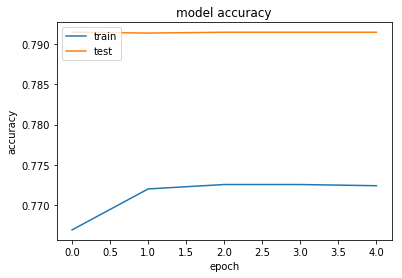

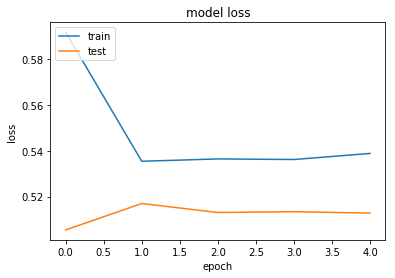

In [57]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
df = pd.read_excel('Credit Card _Dataset.xls')
df.head()
X = df.iloc[:,1:24]
Y = df.iloc[:,24]

# create model
model = Sequential()
model.add(Dense(12, input_dim=23, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=5, batch_size=10, verbose=1)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history[ 'acc' ])
plt.plot(history.history[ 'val_acc' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()

# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss')
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()

# Dropout Regularization in Keras

In [61]:
# Baseline Model on the Sonar Dataset
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
df = pd.read_excel('Credit Card _Dataset.xls')
df.head()
X = df.iloc[:,1:24]
Y = df.iloc[:,24]


# baseline
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(60, input_dim=23, kernel_initializer= 'normal' , activation= 'relu' ))
    model.add(Dense(30, kernel_initializer= 'normal' , activation= 'relu' ))
    model.add(Dense(1, kernel_initializer= 'normal' , activation= 'sigmoid' ))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
    model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])
    return model

numpy.random.seed(seed)
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_baseline, epochs=5,batch_size=16, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X,Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/5
20000/20000 [==============================] - 18s 896us/step - loss: 0.5054 - acc: 0.7857
Epoch 2/5
20000/20000 [==============================] - 8s 421us/step - loss: 0.4487 - acc: 0.8149
Epoch 3/5
20000/20000 [==============================] - 9s 452us/step - loss: 0.4420 - acc: 0.8178
Epoch 4/5
20000/20000 [==============================] - 9s 426us/step - loss: 0.4378 - acc: 0.8181
Epoch 5/5
20000/20000 [==============================] - 9s 451us/step - loss: 0.4359 - acc: 0.8193


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


10000/10000 [==============================] - 8s 763us/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/5
20000/20000 [==============================] - 20s 989us/step - loss: 0.4847 - acc: 0.7954
Epoch 2/5
20000/20000 [==============================] - 9s 437us/step - loss: 0.4427 - acc: 0.8178
Epoch 3/5
20000/20000 [==============================] - 9s 432us/step - loss: 0.4371 - acc: 0.8212
Epoch 4/5
20000/20000 [==============================] - 9s 431us/step - loss: 0.4345 - acc: 0.8199
Epoch 5/5
20000/20000 [==============================] - 9s 431us/step - loss: 0.4320 - acc: 0.8224


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


10000/10000 [==============================] - 7s 722us/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/5
20000/20000 [==============================] - 19s 940us/step - loss: 0.4852 - acc: 0.7970
Epoch 2/5
20000/20000 [==============================] - 9s 463us/step - loss: 0.4436 - acc: 0.8178
Epoch 3/5
20000/20000 [==============================] - 9s 470us/step - loss: 0.4381 - acc: 0.8195
Epoch 4/5
20000/20000 [==============================] - 9s 433us/step - loss: 0.4354 - acc: 0.8209
Epoch 5/5
20000/20000 [==============================] - 9s 445us/step - loss: 0.4334 - acc: 0.8184


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


10000/10000 [==============================] - 7s 743us/step
Baseline: 81.91% (0.24%)


In [62]:
# Example of Dropout on the Sonar Dataset: Visible Layer
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
df = pd.read_excel('Credit Card _Dataset.xls')
df.head()
X = df.iloc[:,1:24]
Y = df.iloc[:,24]


# dropout in the input layer with weight constraint
def create_model():
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(23,)))
    model.add(Dense(60, kernel_initializer= 'normal' , activation= 'relu' ,
    kernel_constraint=maxnorm(3)))
    model.add(Dense(30, kernel_initializer= 'normal' , activation= 'relu' ,
    kernel_constraint=maxnorm(3)))
    model.add(Dense(1, kernel_initializer= 'normal' , activation= 'sigmoid' ))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
    model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])
    return model

numpy.random.seed(seed)
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_baseline, epochs=5,batch_size=16, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/3
26999/26999 [==============================] - 22s 797us/step - loss: 0.4837 - acc: 0.7917
Epoch 2/3
26999/26999 [==============================] - 12s 437us/step - loss: 0.4746 - acc: 0.7967
Epoch 3/3
26999/26999 [==============================] - 12s 433us/step - loss: 0.4700 - acc: 0.7963


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3001/3001 [==============================] - 5s 2ms/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/3
26999/26999 [==============================] - 21s 795us/step - loss: 0.4840 - acc: 0.7890
Epoch 2/3
26999/26999 [==============================] - 12s 445us/step - loss: 0.4717 - acc: 0.7954
Epoch 3/3
26999/26999 [==============================] - 13s 480us/step - loss: 0.4706 - acc: 0.7967


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3001/3001 [==============================] - 6s 2ms/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/3
26999/26999 [==============================] - 22s 821us/step - loss: 0.4860 - acc: 0.7904
Epoch 2/3
26999/26999 [==============================] - 12s 441us/step - loss: 0.4748 - acc: 0.7941
Epoch 3/3
26999/26999 [==============================] - 12s 452us/step - loss: 0.4723 - acc: 0.7923


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3001/3001 [==============================] - 6s 2ms/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/3
26999/26999 [==============================] - 22s 830us/step - loss: 0.4859 - acc: 0.7950
Epoch 2/3
26999/26999 [==============================] - 12s 446us/step - loss: 0.4741 - acc: 0.7938
Epoch 3/3
26999/26999 [==============================] - 12s 451us/step - loss: 0.4739 - acc: 0.7924


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3001/3001 [==============================] - 5s 2ms/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/3
27000/27000 [==============================] - 22s 821us/step - loss: 0.4840 - acc: 0.7907
Epoch 2/3
27000/27000 [==============================] - 12s 448us/step - loss: 0.4771 - acc: 0.7964
Epoch 3/3
27000/27000 [==============================] - 12s 443us/step - loss: 0.4705 - acc: 0.7973


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3000/3000 [==============================] - 5s 2ms/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/3
27000/27000 [==============================] - 23s 864us/step - loss: 0.4814 - acc: 0.7958
Epoch 2/3
27000/27000 [==============================] - 13s 485us/step - loss: 0.4787 - acc: 0.7895
Epoch 3/3
27000/27000 [==============================] - 13s 472us/step - loss: 0.4724 - acc: 0.7942


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3000/3000 [==============================] - 5s 2ms/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/3
27001/27001 [==============================] - 22s 805us/step - loss: 0.4798 - acc: 0.7969
Epoch 2/3
27001/27001 [==============================] - 10s 388us/step - loss: 0.4755 - acc: 0.7990
Epoch 3/3
27001/27001 [==============================] - 11s 395us/step - loss: 0.4729 - acc: 0.7947


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2999/2999 [==============================] - 6s 2ms/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/3
27001/27001 [==============================] - 25s 943us/step - loss: 0.4828 - acc: 0.7936
Epoch 2/3
27001/27001 [==============================] - 12s 454us/step - loss: 0.4730 - acc: 0.7949
Epoch 3/3
27001/27001 [==============================] - 12s 458us/step - loss: 0.4699 - acc: 0.7925


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2999/2999 [==============================] - 5s 2ms/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/3
27001/27001 [==============================] - 23s 853us/step - loss: 0.4819 - acc: 0.7935
Epoch 2/3
27001/27001 [==============================] - 13s 463us/step - loss: 0.4748 - acc: 0.7903
Epoch 3/3
27001/27001 [==============================] - 13s 481us/step - loss: 0.4718 - acc: 0.7949


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2999/2999 [==============================] - 5s 2ms/step


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Epoch 1/3
27001/27001 [==============================] - 23s 843us/step - loss: 0.4851 - acc: 0.7886
Epoch 2/3
27001/27001 [==============================] - 12s 457us/step - loss: 0.4792 - acc: 0.7903
Epoch 3/3
27001/27001 [==============================] - 12s 461us/step - loss: 0.4741 - acc: 0.7886


/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2999/2999 [==============================] - 5s 2ms/step
Visible: 79.58% (1.60%)


In [3]:
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# load dataset
df = pd.read_excel('Credit Card _Dataset.xls')
df.head()
X = df.iloc[:,1:24]
Y = df.iloc[:,24]




# dropout in hidden layers with weight constraint
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=23,kernel_initializer='normal',activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(30, kernel_initializer= 'normal' , activation= 'relu' ,kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer= 'normal' , activation= 'sigmoid' ))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
    model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])
    return model


numpy.random.seed(seed)
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_model, epochs=3, batch_size=16,verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
20000/20000 [==============================] - 4s 178us/step - loss: 0.4942 - acc: 0.7966
Epoch 2/3
20000/20000 [==============================] - 3s 126us/step - loss: 0.4854 - acc: 0.7832
Epoch 3/3
10000/10000 [==============================] - 1s 59us/step
Epoch 1/3
20000/20000 [==============================] - 3s 158us/step - loss: 0.4900 - acc: 0.7959
Epoch 2/3
20000/20000 [==============================] - 3s 130us/step - loss: 0.4966 - acc: 0.7867
Epoch 3/3
10000/10000 [==============================] - 1s 58us/step
Epoch 1/3
20000/20000 [==============================] - 3s 168us/step - loss: 0.4903 - acc: 0.7915
Epoch 2/3
20000/20000 [==============================] - 3s 131us/step - loss: 0.4842 - acc: 0.7792
Epoch 3/3
10000/10000 [==

# Time-Based Learning Rate Decay

In [4]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
df = pd.read_excel('Credit Card _Dataset.xls')
df.head()
X = df.iloc[:,1:24]
Y = df.iloc[:,24]



# create model
model = Sequential()
model.add(Dense(34, input_dim=23, kernel_initializer= 'normal' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'normal' , activation= 'sigmoid' ))


# Compile model
epochs = 5
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Train on 20099 samples, validate on 9901 samples
Epoch 1/5
 - 1s - loss: 3.6701 - acc: 0.7723 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 2/5
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 3/5
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 4/5
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 5/5
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914


# Drop-Based Learning Rate Decay.

In [6]:
# Drop-Based Learning Rate Decay
import pandas
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
df = pd.read_excel('Credit Card _Dataset.xls')
df.head()
X = df.iloc[:,1:24]
Y = df.iloc[:,24]


# create model
model = Sequential()
model.add(Dense(34, input_dim=23, kernel_initializer= 'normal' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'normal' , activation= 'sigmoid' ))
# Compile model
sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list,verbose=2)

Train on 20099 samples, validate on 9901 samples
Epoch 1/50
 - 2s - loss: 3.6701 - acc: 0.7723 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 2/50
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 3/50
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 4/50
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 5/50
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 6/50
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 7/50
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 8/50
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 9/50
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 10/50
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 11/50
 - 1s - loss: 3.6656 - acc: 0.7726 - val_loss: 3.3617 - val_acc: 0.7914
Epoch 12/50
 - 1s - loss: 3.6656 - a

In [6]:
data = pd.read_csv('file1.csv')

In [7]:
#drop all invalid number
data.drop(data[data['number'] == ' None'].index, axis=0, inplace=True)
#convert obj to numeric
data['number'] = pd.to_numeric(data['number'])

/home/kiit/anaconda3/envs/tf_training/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
